# Archivo:GeolifePrj_02_geomining
## Data Mining y ML y GeoJson

In [158]:
import geopandas
import numpy as np
import pandas as pd
#from shapely.geometry import Point
from geojson import  Point,Feature, FeatureCollection, dumps
from datetime import timedelta, datetime
import csv, json

import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

from collections import OrderedDict

from shapely.geometry import LineString
from shapely.geometry import Point


from dateutil.parser import parse as parsedt

In [168]:
mode_names = ['walk', 'bike', 'bus', 'car', 'subway','train', 
              'airplane', 'boat', 'run', 'motorcycle', 'taxi']
mode_marker = ['pitch', 'bicycle', 'bus', "car", 'rail-underground','rail', 
              'airport', 'ferry', 'pitch', 'scooter', 'car']
mode_color = ['#f16f04', '#1ac16b', '#68aa31', '#8043b1', '#29c6db','#470e53', 
              '#595454', '#2026d5', '#f16f04', '#e52315', '#f6fa00']

mode_ids = {s : i + 1 for i, s in enumerate(mode_names)}
mode_marker_dict = {i + 1:s for i, s in enumerate(mode_marker)}
mode_color_dict = {i + 1:s for i, s in enumerate(mode_color)}

cmaps = {}
cmaps['Uniform'] = [ 'viridis', 'plasma', 'inferno', 'magma', 'cividis','spring','summer','autumn','winter']
cmaps['Diverging'] = [ 'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']
cmaps['Cyclic'] = ['twilight', 'twilight_shifted', 'hsv']
cmaps['Miscellaneous'] = [ 'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg',
            'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar']

cmap = plt.get_cmap(cmaps['Uniform'][0])
colors.to_hex(cmap(255))

'#fde725'

In [39]:
mode_marker_dict[9]

'walk'

In [415]:
gdf_simpl = geopandas.read_file("geolife_000_simpl.geojson")
                
#gdf_simpl.to_file("_pruebas_106w.geojson", driver="GeoJSON")

gdf_simpl

,date,geometry
0,2008-10-23T02:53:00,POINT (116.31842 39.98470)
1,2008-10-23T02:54:00,POINT (116.31672 39.98459)
2,2008-10-23T02:55:00,POINT (116.31443 39.98448)
3,2008-10-23T02:56:00,POINT (116.31292 39.98470)
4,2008-10-23T02:57:00,POINT (116.31066 39.98466)
...,...,...
15118,2009-07-05T07:41:00,POINT (116.32658 39.99623)
15119,2009-07-05T07:42:00,POINT (116.32897 39.99907)
15120,2009-07-05T07:43:00,POINT (116.32737 39.99997)
15121,2009-07-05T07:44:00,POINT (116.32733 39.99997)


# Clustering

In [169]:
df_simpl = pd.read_csv("geolife_000_simpl.csv")
df_simpl

,date,latitude,longitude,label
0,2008-10-23 02:53:00,39.98470,116.31842,0
1,2008-10-23 02:54:00,39.98459,116.31672,0
2,2008-10-23 02:55:00,39.98448,116.31443,0
3,2008-10-23 02:56:00,39.98470,116.31292,0
4,2008-10-23 02:57:00,39.98466,116.31066,0
...,...,...,...,...
15118,2009-07-05 07:41:00,39.99623,116.32658,0
15119,2009-07-05 07:42:00,39.99907,116.32897,0
15120,2009-07-05 07:43:00,39.99997,116.32737,0
15121,2009-07-05 07:44:00,39.99997,116.32733,0


In [170]:
from sklearn.cluster import KMeans
import numpy as np

x = df_simpl[['latitude','longitude']].astype(float).to_numpy()
x

array([[ 39.9847 , 116.31842],
       [ 39.98459, 116.31672],
       [ 39.98448, 116.31443],
       ...,
       [ 39.99997, 116.32737],
       [ 39.99997, 116.32733],
       [ 40.00043, 116.32721]])

In [172]:

km = KMeans() 
km.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [173]:
km.cluster_centers_

array([[ 40.10284053, 116.13463172],
       [ 31.24028807, 121.46405902],
       [ 39.99827067, 116.32057145],
       [ 39.9386035 , 116.75022362],
       [ 31.11543025, 121.06211494],
       [ 39.83449707, 116.26849659],
       [ 39.91796624, 116.41958955],
       [ 40.06040689, 116.5541515 ]])

In [26]:
x = gdf_simpl['geometry'].to_list()

x
#km = KMeans()
#km.fit(x)

In [406]:
np.array([[1, 2,4], [1, 4,3], [1, 0,2], [10, 2,9]])


array([[ 1,  2,  4],
       [ 1,  4,  3],
       [ 1,  0,  2],
       [10,  2,  9]])

In [416]:
usuarios_df[usuario_num][['latitude','longitude']].astype(float).to_numpy()


array([[ 40.0137, 116.4735],
       [ 40.0116, 116.4798],
       [ 40.0006, 116.4908],
       ...,
       [ 39.9753, 116.3306],
       [ 39.9757, 116.3309],
       [ 39.9756, 116.3309]])

In [433]:
dfxb = geopandas.read_file("map.geojson")
dfxb.w

,marker-color,marker-size,marker-symbol,stroke,stroke-width,stroke-opacity,fill,fill-opacity,geometry
0,#d77070,small,square,None,NaN,NaN,None,NaN,POINT (84.26239 42.79540)
1,None,None,None,#e7dada,2.0,1.0,#ffffff,0.0,"POLYGON ((84.35303 42.86590, 84.33380 42.75710..."
2,None,None,None,None,NaN,NaN,None,NaN,"LINESTRING (84.56039 42.77323, 84.50684 42.899..."


In [421]:

from geopy.distance import distance
distance(p1, p2)
Out: Distance(229.883275249)
distance(p1, p2).km
Out: 229.88327524944066

NameError: name 'p1' is not defined

# Cargamos y creamos columnas de velocidad y más

In [161]:
#agrega columna de velocidad 'vel' , 'velMA' y velMA2
def read_df_add_vel(pickle_file , vel='vel', lat='lat',lon='lon',time='time'):
    df = pd.read_pickle(pickle_file)
    
    df['idx_traj'] = df.index
    df.idx_traj=df.idx_traj.apply(int)
    df.reset_index(inplace=True,drop=True)
    df[vel]=0
    vel_ix = df.columns.get_loc(vel)
    lat_ix = df.columns.get_loc(lat)
    lon_ix = df.columns.get_loc(lon)
    time_ix = df.columns.get_loc(time)
    factor_r2m=111139*3.6 # gps/t  ->  km/h  // 111139 -> m/s
    for i in range(1,len(df)):
        d=factor_r2m*((df.iloc[i,lon_ix]-df.iloc[i-1,lon_ix])**2+(df.iloc[i,lat_ix]-df.iloc[i-1,lat_ix])**2)**0.5  #pythagoras entre row(i) y row(i-1=)
        t=(df.iloc[i,time_ix]-df.iloc[i-1,time_ix]).seconds
        if t==0:
            df.iloc[i,vel_ix]=0
        else:
            df.iloc[i,vel_ix]=np.float(d/t)
    df.iloc[0,vel_ix]=df.vel.iloc[1]
    df.vel=df.vel.apply(lambda x:round(x,2))    
    
    df['velMA']= df[vel].rolling(30, win_type='triang',min_periods=1, center=True).mean()
    clip1 = df.velMA.max()
    print(f"clip: {clip1}")
    df['velprep']=df.vel.apply(lambda x : x if x<clip1 else 0 )    
    df['velMA']= df['velprep'].rolling(15, win_type='triang',min_periods=1, center=True).mean()
    df['velMA2']= df['velprep'].rolling(25, win_type='hamming',min_periods=1,center=True).mean() 
    
    return df.copy()


In [162]:
def plot_evolucion_vel( df,start_dt , end_dt , vel='vel', tit="Evolucion de velocidad"):
    #muestra velocidad a través del tiempo
    if not isinstance(start_dt, datetime):
        start_dt = parsedt(start_dt)
    if not isinstance(end_dt, datetime):
        end_dt = parsedt(end_dt)
        
    df = df.loc[(df.time > start_dt) & (df.time < end_dt)]

    f=plt.figure(figsize=(20,10))
    f.suptitle(tit, fontsize=26)
    plt.xlabel(f'TIEMPO: del  {start_dt}  al  {end_dt}', fontsize=16)
    plt.ylabel('VELOCIDAD [km/h]', fontsize=16)
    
    #rangotiks=df.velMA.nlargest(20).index.values.tolist()
    #rangotiks.extend(df.velMA.nsmallest(20).index.values.tolist())
    rangotiks=range(df.index[0],dft.index[len(dft)-1],round(len(df)/20+1))
    rangolabels = list(df.loc[df.index.isin(rangotiks), 'time'])
    plt.xticks(ticks=rangotiks, labels=rangolabels,  rotation=90)
    
    plt.plot(df[vel] , 'b')
    plt.plot(df.velMA, 'ro') 
    plt.plot(df.velMA2, 'g') 
    
    #plt.axvline(x=0.22058956)
    #plt.axvline(x=0.33088437)
    #plt.axvline(x=2.20589566)


In [163]:
df=read_df_add_vel("geolife_135.zip", vel='vel',lat='lat',lon='lon',time='time')

df

clip: 166.7555333333333


,time,lat,lon,alt,label,user,idx_traj,vel,velMA,velprep,velMA2
0,2008-12-24 14:42:07,39.915478,116.405030,232.9,0,135,0,3.34,8.636667,3.34,9.578013
1,2008-12-24 14:42:08,39.915485,116.405025,232.9,0,135,1,3.34,9.146512,3.34,9.855282
2,2008-12-24 14:46:14,39.915705,116.405042,226.4,0,135,2,0.36,9.697347,0.36,10.053756
3,2008-12-24 14:46:16,39.915765,116.404975,226.4,0,135,3,17.95,10.570000,17.95,10.197216
4,2008-12-24 14:46:18,39.915837,116.404877,226.4,0,135,4,24.33,11.063966,24.33,10.309616
...,...,...,...,...,...,...,...,...,...,...,...
84419,2009-01-27 04:50:15,26.424389,111.612672,312.0,0,135,999,2.43,2.992586,2.43,3.130536
84420,2009-01-27 04:50:20,26.424420,111.612681,310.0,0,135,1000,2.58,3.282037,2.58,3.226201
84421,2009-01-27 04:50:25,26.424469,111.612675,309.0,0,135,1001,3.95,3.608980,3.95,3.363533
84422,2009-01-27 04:50:29,26.424519,111.612655,307.0,0,135,1002,5.39,3.954651,5.39,3.510203


In [164]:
mode_ids = {s : i + 1 for i, s in enumerate(mode_names)}
mode_marker_dict = {i + 1:s for i, s in enumerate(mode_marker)}
mode_color_dict = {i + 1:s for i, s in enumerate(mode_color)}

# Calcula inicio y fin de trayectorias

In [165]:
start_ix=df.loc[df.idx_traj==0].index.tolist()
end_ix = [ i-1 for i in start_ix[1:]]
end_ix.append(len(df)-1)
print(start_ix,"\n",end_ix)

[0, 640, 3976, 5048, 7753, 7828, 10219, 13151, 14881, 15153, 15781, 80264, 83420] 
 [639, 3975, 5047, 7752, 7827, 10218, 13150, 14880, 15152, 15780, 80263, 83419, 84423]


# Plot Evolucion de velocidades

2007/09/07 00:30:06 2007/10/04 07:17:45
2008-12-24 14:42:07  <-->  2008-12-24 15:26:45
2008-12-27 07:26:04  <-->  2008-12-27 12:28:24
2008-12-28 10:36:05  <-->  2008-12-28 12:19:32


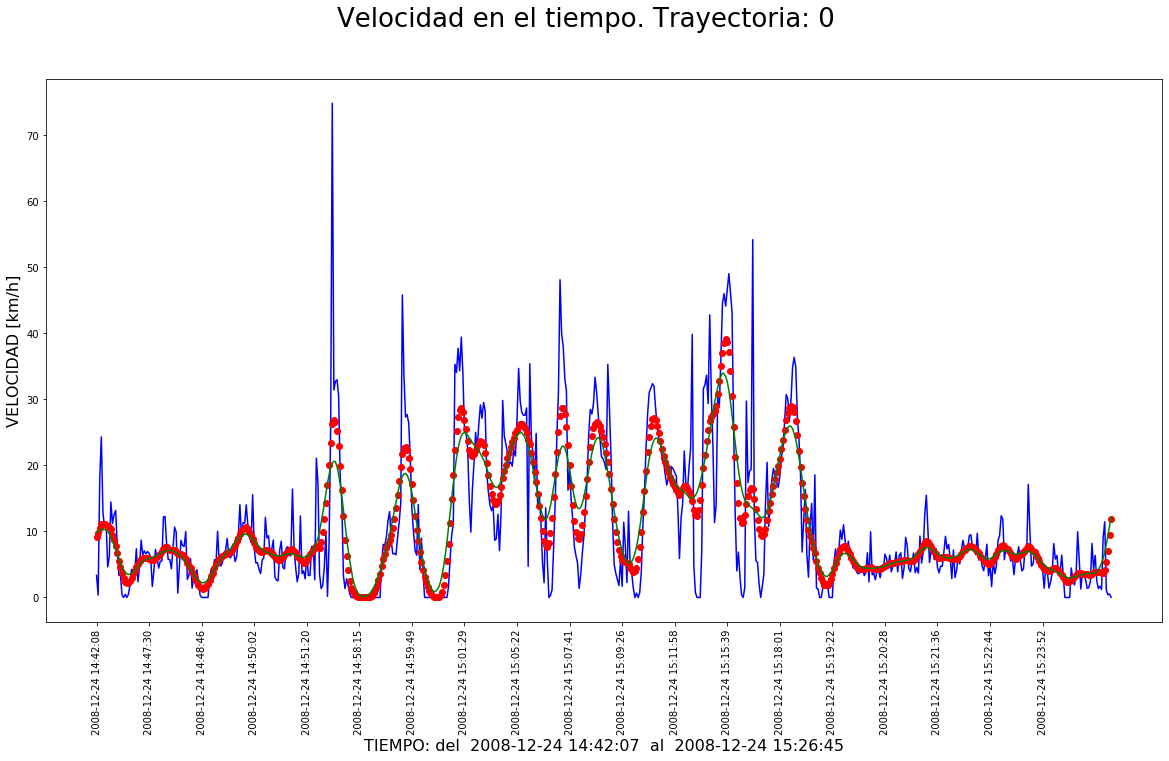

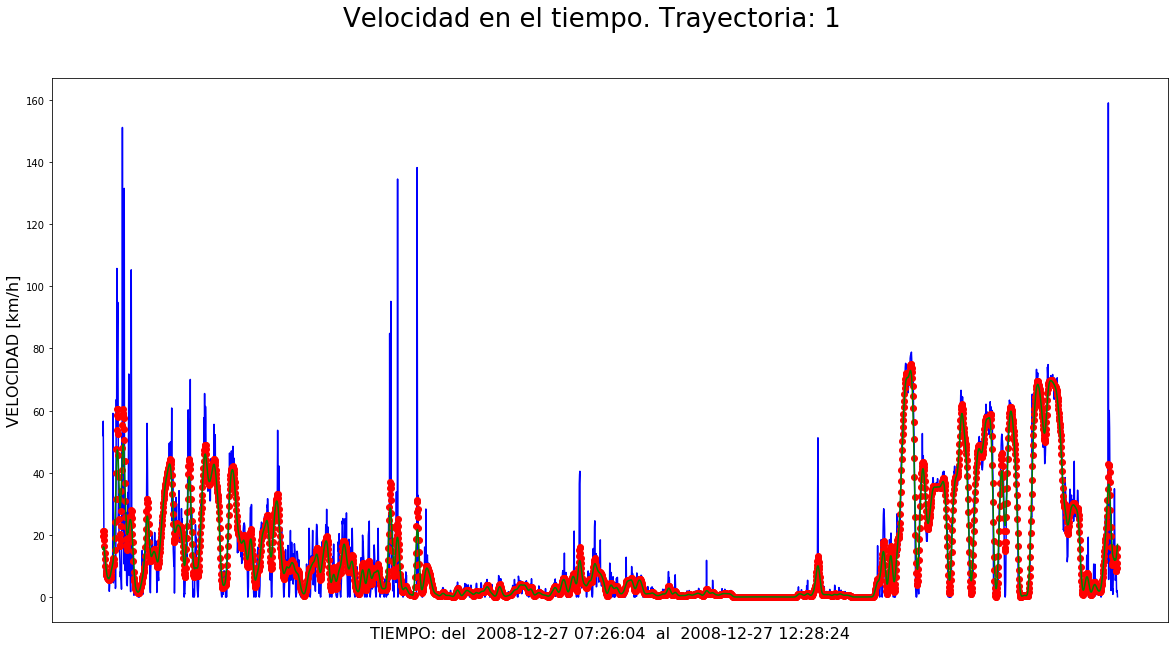

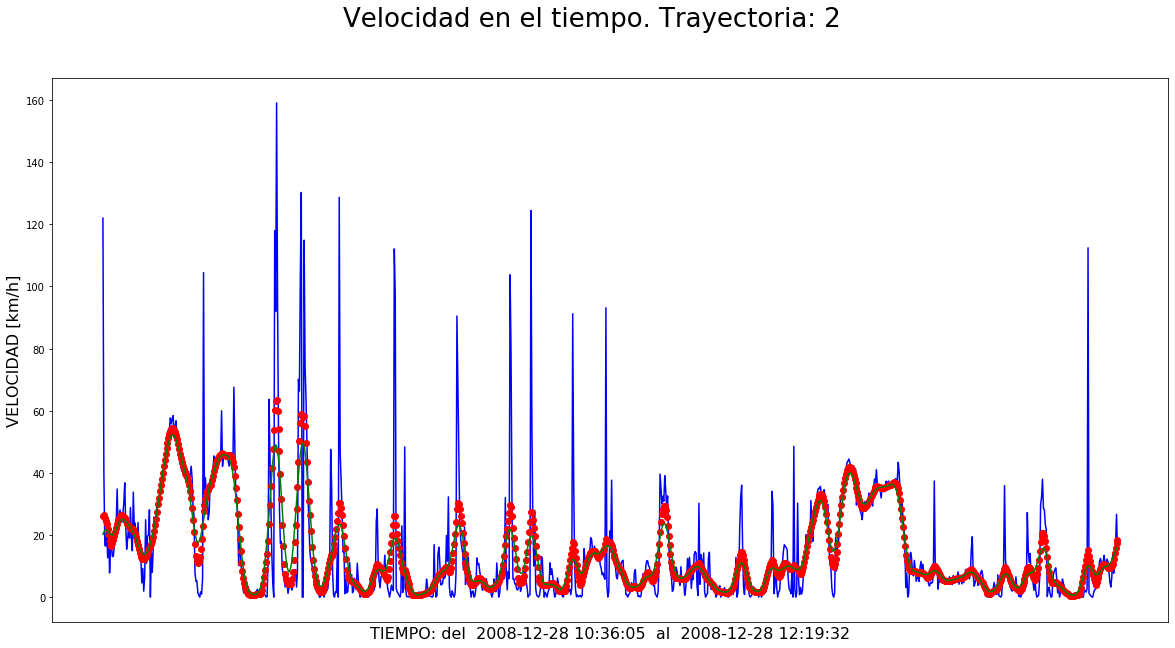

In [166]:
s_str='2007/09/07 00:30:06' #df.loc[0,'time'] #'2007/10/04'
e_str='2007/10/04 07:17:45' #df.iloc[-1,df.columns.get_loc('time')] #
print(s_str,e_str)
for trayectoria,rangodt in [ (idx, x) for idx,x in enumerate(zip(start_ix,end_ix)) if idx<3] :
    s_str=df.loc[rangodt[0],'time']
    e_str=df.loc[rangodt[1],'time']
    print(s_str," <--> ",e_str)
    plot_evolucion_vel(df,s_str,e_str, vel='velprep' , tit=f"Velocidad en el tiempo. Trayectoria: {trayectoria}")


In [67]:
for a,b in [ (idx, x) for idx,x in enumerate(zip(start_ix,end_ix)) if idx<6]:
    print(a,b)

0 (0, 86)
1 (87, 352)
2 (353, 507)
3 (508, 621)
4 (622, 1463)
5 (1464, 13304)


In [1001]:
rangotiks=df.velMA.nlargest(20).index.values.tolist()
rangotiks.extend(df.velMA.nsmallest(20).index.values.tolist())

rangotiks

[865,
 866,
 867,
 868,
 864,
 869,
 1090,
 1091,
 863,
 1089,
 1092,
 1093,
 870,
 1088,
 1094,
 862,
 1095,
 1087,
 1096,
 871,
 403,
 402,
 404,
 263,
 264,
 1233,
 1232,
 262,
 401,
 326,
 1234,
 1231,
 405,
 374,
 376,
 375,
 242,
 325,
 377,
 265]

In [116]:
dft=df.loc[(df.time > parsedt('2008-05-09 08:13:55')) & (df.time < parsedt('2008-05-12 08:13:55'))]
dft.loc[ dft.index.isin([1,3,4,5,6,7,8,9,10,11]) , 'time']

3    2008-05-09 08:15:45
4    2008-05-09 10:08:06
5    2008-05-09 10:08:16
6    2008-05-09 10:08:37
7    2008-05-09 10:09:16
8    2008-05-09 10:09:32
9    2008-05-09 10:09:39
10   2008-05-09 10:09:49
11   2008-05-09 10:09:58
Name: time, dtype: datetime64[ns]

In [106]:
dft.index,dft.index[len(dft)-1]

Int64Index([  3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
            ...
            612, 613, 614, 615, 616, 617, 618, 619, 620, 621],
           dtype='int64', length=619)

In [ ]:
dft.

In [1011]:
df.vel.nlargest(100).mean()

96.50730000000007

In [157]:
df

,time,lat,lon,idx_traj,vel,velMA,velprep,velMA2,marker-size
0,2007-11-30 14:34:51,39.976242,116.329840,0,0.96,2.142222,0.96,2.279540,large
1,2007-11-30 14:34:52,39.976243,116.329838,1,0.96,2.195349,0.96,2.342833,large
2,2007-11-30 14:38:53,39.976242,116.330092,2,0.42,2.248776,0.42,2.409155,large
3,2007-11-30 17:29:49,39.976428,116.330150,3,0.01,2.406667,0.01,2.511587,large
4,2007-11-30 17:29:50,39.976403,116.330137,4,11.33,2.639828,11.33,2.641562,large
...,...,...,...,...,...,...,...,...,...
38567,2008-10-12 19:48:36,39.990803,116.297390,2031,1.96,5.258448,1.96,5.336593,large
38568,2008-10-12 19:48:38,39.990782,116.297385,2032,4.45,5.117778,4.45,5.298031,large
38569,2008-10-12 19:48:40,39.990760,116.297380,2033,4.44,5.039592,4.44,5.261034,large
38570,2008-10-12 19:48:42,39.990748,116.297358,2034,4.91,4.969767,4.91,5.192238,large


In [135]:

mode_ids = {s : i + 1 for i, s in enumerate(mode_names)}
mode_marker_dict = {i + 1:s for i, s in enumerate(mode_marker)}
mode_color_dict = {i + 1:s for i, s in enumerate(mode_color)}
print(mode_marker,mode_color)

['pitch', 'bicycle', 'bus', 'car', 'rail-underground', 'rail', 'airport', 'ferry', 'pitch', 'scooter', 'car'] ['#f16f04', '#1ac16b', '#68aa31', '#8043b1', '#29c6db', '#470e53', '#595454', '#2026d5', '#f16f04', '#e52315', '#f6fa00']


In [155]:
df.drop(columns=['alt','label','user'],inplace=True)
df['marker-size']='large'
df['marker-color']=df.label.apply(lambda x: mode_color[x]  if x > 0 else "#454545" )
df['marker-symbol']="square"

AttributeError: 'DataFrame' object has no attribute 'label'

In [153]:
mode_color[x] if x > 0 else 0

'#e52315'

In [154]:
x = 0

In [682]:
del(gdf)
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.lon, df.lat))
gdf.drop(columns=['lat','lon'],inplace=True)
gdf

,time,alt,label,user,vel,velr,geometry
0,2007-10-19 05:23:15,482.283465,11,175,5.113602,5,POINT (116.33060 39.97512)
1,2007-10-19 05:24:15,482.283465,11,175,5.113602,5,POINT (116.32983 39.97510)
2,2007-10-19 05:25:29,157.480315,11,175,8.628732,10,POINT (116.32825 39.97530)
3,2007-10-19 05:27:53,111.548556,11,175,24.182711,25,POINT (116.31955 39.97505)
4,2007-10-19 05:28:51,203.412073,11,175,47.026808,45,POINT (116.31273 39.97497)
...,...,...,...,...,...,...,...
303,2007-10-22 01:48:25,104.986877,3,175,8.299702,10,POINT (116.31565 39.96592)
304,2007-10-22 01:49:25,104.986877,3,175,4.149520,5,POINT (116.31587 39.96650)
305,2007-10-22 01:49:46,124.671916,3,175,23.304061,25,POINT (116.31472 39.96692)
306,2007-10-22 01:51:19,216.535433,3,175,4.886835,5,POINT (116.31428 39.96797)


In [686]:
gdf.loc[:,gdf.columns!='geometry']

,time,alt,label,user,vel,velr
0,2007-10-19 05:23:15,482.283465,11,175,5.113602,5
1,2007-10-19 05:24:15,482.283465,11,175,5.113602,5
2,2007-10-19 05:25:29,157.480315,11,175,8.628732,10
3,2007-10-19 05:27:53,111.548556,11,175,24.182711,25
4,2007-10-19 05:28:51,203.412073,11,175,47.026808,45
...,...,...,...,...,...,...
303,2007-10-22 01:48:25,104.986877,3,175,8.299702,10
304,2007-10-22 01:49:25,104.986877,3,175,4.149520,5
305,2007-10-22 01:49:46,124.671916,3,175,23.304061,25
306,2007-10-22 01:51:19,216.535433,3,175,4.886835,5


In [689]:
gdf.time=gdf.time.astype(str)
gdf.dtypes

time          object
alt          float64
label          int64
user           int64
vel          float64
velr           int64
geometry    geometry
dtype: object

In [691]:
gdf.loc[300,'vel']

0.48469027625997424

In [87]:
gdf.to_file("geolife_170_.geojson", driver="GeoJSON")

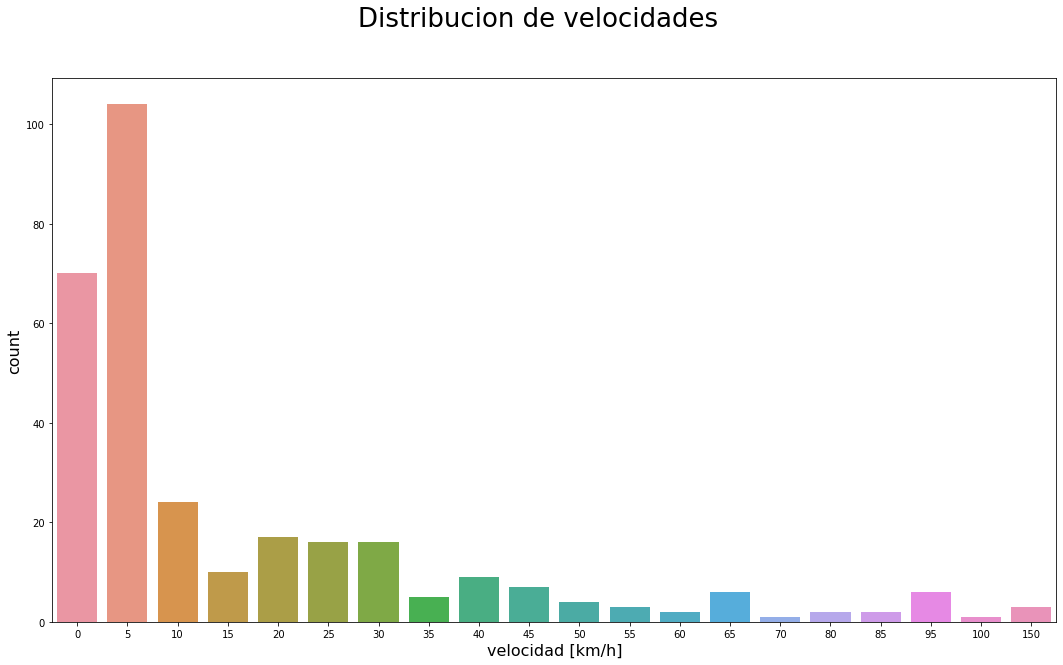

In [681]:
df['velr']=df.vel.apply(lambda x:5*round(x/5))
l=[e if e<150 else 150 for e in df.velr ]

f=plt.figure(figsize=(18,10))
f.suptitle('Distribucion de velocidades', fontsize=26)
plt.xlabel('velocidad [km/h]', fontsize=16)
plt.ylabel('features', fontsize=16)
#ax.set_title("Distribucion de velocidades [km/h]", fontsize=14)
sns.countplot(l)

In [143]:
from sklearn.cluster import KMeans
import numpy as np

#x = df_copy[['lat','lon']].astype(float).to_numpy()
x =np.array(l2d)

km = KMeans()
km.fit(x)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [144]:
km.cluster_centers_

array([[60.,  1.],
       [60.,  1.],
       [60.,  1.],
       [60.,  1.],
       [60.,  1.],
       [60.,  1.],
       [60.,  1.],
       [60.,  1.]])

In [33]:
x = df_copy[['vel']].to_numpy().reshape(1,-1)
len(x)

1

In [ ]:
sns.countplot()

In [12]:
gdf.geometry.iloc[10:20].to_list()

In [408]:

import geojsonio

In [412]:
ruta='''
{"features": [{"geometry": {"coordinates": [116.3318, 39.976], "type": "Point"}, "properties": {"date": "2010-03-12 17:26:00"}, "type": "Feature"}, {"geometry": {"coordinates": [116.3316, 39.9769], "type": "Point"}, "properties": {"date": "2010-03-12 17:27:00"}, "type": "Feature"}, {"geometry": {"coordinates": [116.3319, 39.9776], "type": "Point"}, "properties": {"date": "2010-03-12 17:28:00"}, "type": "Feature"}, {"geometry": {"coordinates": [116.332, 39.9776], "type": "Point"}, "properties": {"date": "2010-03-12 17:29:00"}, "type": "Feature"}, {"geometry": {"coordinates": [116.3319, 39.9774], "type": "Point"}, "properties": {"date": "2010-03-12 17:30:00"}, "type": "Feature"}, {"geometry": {"coordinates": [116.3322, 39.9776], "type": "Point"}, "properties": {"date": "2010-03-12 17:31:00"}, "type": "Feature"}, {"geometry": {"coordinates": [116.3319, 39.9775], "type": "Point"}, "properties": {"date": "2010-03-12 17:32:00"}, "type": "Feature"}, {"geometry": {"coordinates": [116.3313, 39.9781], "type": "Point"}, "properties": {"date": "2010-03-12 17:33:00"}, "type": "Feature"}], "type": "FeatureCollection"}
''' 

print(ruta)
geojsonio.display(ruta)


{"features": [{"geometry": {"coordinates": [116.3318, 39.976], "type": "Point"}, "properties": {"date": "2010-03-12 17:26:00"}, "type": "Feature"}, {"geometry": {"coordinates": [116.3316, 39.9769], "type": "Point"}, "properties": {"date": "2010-03-12 17:27:00"}, "type": "Feature"}, {"geometry": {"coordinates": [116.3319, 39.9776], "type": "Point"}, "properties": {"date": "2010-03-12 17:28:00"}, "type": "Feature"}, {"geometry": {"coordinates": [116.332, 39.9776], "type": "Point"}, "properties": {"date": "2010-03-12 17:29:00"}, "type": "Feature"}, {"geometry": {"coordinates": [116.3319, 39.9774], "type": "Point"}, "properties": {"date": "2010-03-12 17:30:00"}, "type": "Feature"}, {"geometry": {"coordinates": [116.3322, 39.9776], "type": "Point"}, "properties": {"date": "2010-03-12 17:31:00"}, "type": "Feature"}, {"geometry": {"coordinates": [116.3319, 39.9775], "type": "Point"}, "properties": {"date": "2010-03-12 17:32:00"}, "type": "Feature"}, {"geometry": {"coordinates": [116.3313, 39

'http://geojson.io/#data=data:application/json,%0A%7B%22features%22%3A%20%5B%7B%22geometry%22%3A%20%7B%22coordinates%22%3A%20%5B116.3318%2C%2039.976%5D%2C%20%22type%22%3A%20%22Point%22%7D%2C%20%22properties%22%3A%20%7B%22date%22%3A%20%222010-03-12%2017%3A26%3A00%22%7D%2C%20%22type%22%3A%20%22Feature%22%7D%2C%20%7B%22geometry%22%3A%20%7B%22coordinates%22%3A%20%5B116.3316%2C%2039.9769%5D%2C%20%22type%22%3A%20%22Point%22%7D%2C%20%22properties%22%3A%20%7B%22date%22%3A%20%222010-03-12%2017%3A27%3A00%22%7D%2C%20%22type%22%3A%20%22Feature%22%7D%2C%20%7B%22geometry%22%3A%20%7B%22coordinates%22%3A%20%5B116.3319%2C%2039.9776%5D%2C%20%22type%22%3A%20%22Point%22%7D%2C%20%22properties%22%3A%20%7B%22date%22%3A%20%222010-03-12%2017%3A28%3A00%22%7D%2C%20%22type%22%3A%20%22Feature%22%7D%2C%20%7B%22geometry%22%3A%20%7B%22coordinates%22%3A%20%5B116.332%2C%2039.9776%5D%2C%20%22type%22%3A%20%22Point%22%7D%2C%20%22properties%22%3A%20%7B%22date%22%3A%20%222010-03-12%2017%3A29%3A00%22%7D%2C%20%22type%22%3A%20

In [15]:
ls=LineString(gdf.geometry.iloc[10:20].to_list())
gdf.geometry.iloc[0]=ls

In [449]:
print(LineString(gdf.geometry.iloc[10:20].to_list()).wkt)

LINESTRING (116.333778 39.975414, 116.333809 39.975396, 116.333833 39.975382, 116.33385 39.97537, 116.333876 39.975369, 116.333901 39.97538, 116.33392 39.975379, 116.333938 39.97538400000001, 116.33394 39.975408, 116.333942 39.975421)


In [ ]:
geopandas.geodataframe.to_json

In [16]:
gdf

,time,vel,marker-size,marker-color,marker-symbol,geometry
0,2008-04-28 11:27:04,674.240313,small,#ff0011,square,"LINESTRING (116.33378 39.97541, 116.33381 39.9..."
1,2008-04-28 11:27:06,337.120157,small,#ff0011,square,POINT (116.33375 39.97546)
2,2008-04-28 11:27:07,636.396103,small,#ff0011,square,POINT (116.33374 39.97539)
3,2008-04-28 11:27:08,601.331855,small,#ff0011,square,POINT (116.33374 39.97533)
4,2008-04-28 11:27:10,486.338360,small,#ff0011,square,POINT (116.33365 39.97536)
...,...,...,...,...,...,...
889,2008-05-21 02:01:53,91.923882,small,#ff0011,square,POINT (116.33114 39.97555)
890,2008-05-21 02:01:55,74.330344,small,#ff0011,square,POINT (116.33113 39.97554)
891,2008-05-21 02:01:57,55.000000,small,#ff0011,square,POINT (116.33112 39.97554)
892,2008-05-21 02:01:59,26.925824,small,#ff0011,square,POINT (116.33112 39.97554)
